In [13]:
import os
import random
from matplotlib import pyplot as plt
from einops import rearrange
import torch
from src.dataset.vitonhd import VITONHDDataset
from src.utils import get_project_root

PROJECT_ROOT_PATH = get_project_root()

In [2]:
# from pathlib import Path


# data_rootpath = os.path.join(PROJECT_ROOT_PATH, 'datasets', 'vitonhd', 'train')
# img_dir = Path(data_rootpath, 'image')
# [Path(img_dir, im_name) for im_name in os.listdir(img_paths)]
# # print([f for f in img_paths.glob('*.png')])

In [3]:
data_path = os.path.join(PROJECT_ROOT_PATH, 'datasets', 'vitonhd')
dataset = VITONHDDataset(data_path)

In [4]:
dataset_len = len(dataset)
rand_idx = random.randint(0, dataset_len - 1)
rand_sample = dataset[rand_idx]
rand_sample

{'image': Image([[[0.7098, 0.7098, 0.7020,  ..., 0.7255, 0.7333, 0.7333],
         [0.7098, 0.7020, 0.7020,  ..., 0.7255, 0.7333, 0.7333],
         [0.7098, 0.7020, 0.7020,  ..., 0.7255, 0.7255, 0.7333],
         ...,
         [0.5608, 0.5608, 0.5608,  ..., 0.7176, 0.7255, 0.7255],
         [0.5608, 0.5608, 0.5686,  ..., 0.7176, 0.7255, 0.7333],
         [0.5686, 0.5686, 0.5686,  ..., 0.7176, 0.7255, 0.7333]],
 
        [[0.7098, 0.7098, 0.7020,  ..., 0.7255, 0.7333, 0.7333],
         [0.7098, 0.7020, 0.7020,  ..., 0.7255, 0.7333, 0.7333],
         [0.7098, 0.7020, 0.7020,  ..., 0.7255, 0.7255, 0.7333],
         ...,
         [0.5608, 0.5608, 0.5608,  ..., 0.7176, 0.7255, 0.7255],
         [0.5608, 0.5608, 0.5686,  ..., 0.7176, 0.7255, 0.7333],
         [0.5686, 0.5686, 0.5686,  ..., 0.7176, 0.7255, 0.7333]],
 
        [[0.7098, 0.7098, 0.7020,  ..., 0.7255, 0.7333, 0.7333],
         [0.7098, 0.7020, 0.7020,  ..., 0.7255, 0.7333, 0.7333],
         [0.7098, 0.7020, 0.7020,  ..., 0.7255,

In [5]:
rand_sample.keys()

dict_keys(['image', 'masked_image', 'mask', 'densepose', 'cloth'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


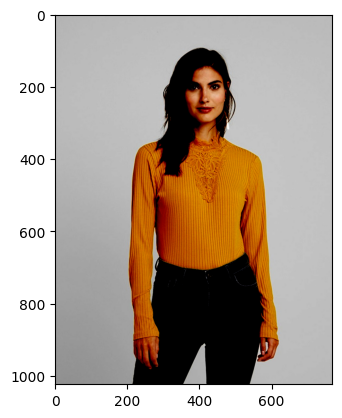

In [10]:
# image = rand_sample['image'].permute(1, 2, 0)
image = rearrange(rand_sample['image'], 'c h w -> h w c')
plt.imshow(image)

In [20]:
def show(img: torch.Tensor, print_shape: bool = False):
    if img.ndim == 3:
        img = rearrange(img, 'c h w -> h w c')
    else:
        raise ValueError('Only support for RGB image for now.')

    if print_shape:
        print(img.shape)

    plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1024, 768, 3])


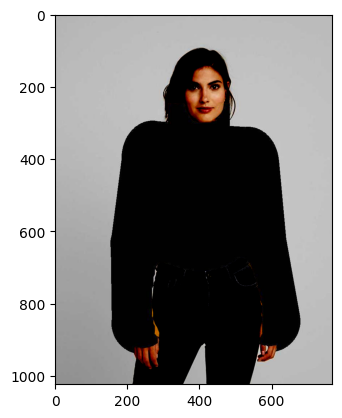

In [21]:
show(rand_sample['masked_image'], True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1024, 768, 3])


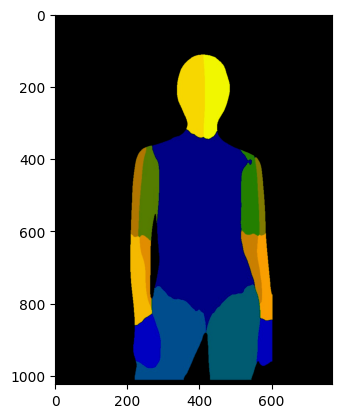

In [23]:
show(rand_sample['densepose'], True)

torch.Size([1024, 768, 3])


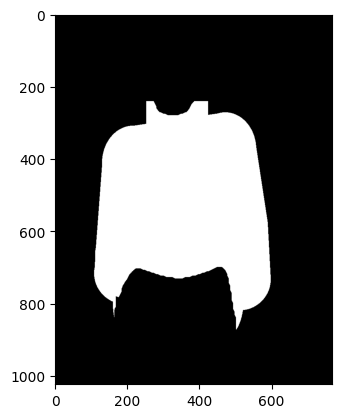

In [25]:
show(rand_sample['mask'], True)